In [41]:
import pandas as pd

import seaborn as sns

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [9]:
import statsmodels.api as sm 

In [11]:
df = pd.read_csv("C:/Users/HP/OneDrive/Documents/walmart.csv")

In [13]:
df.head()

,Year,Month,holiday_weeks,Monthly_sales,avg_temp,avg_fuel_price,avg_cpi,avg_unemployment
0,2010,2,1,196640327.1,36.408804,2.688853,168.777940,8.608152
1,2010,3,0,187791096.5,47.311467,2.784516,168.872342,8.608152
2,2010,4,0,238835170.0,57.084826,2.866491,168.610478,8.482717
3,2010,5,0,192640873.0,65.596739,2.915201,168.574473,8.482717
4,2010,6,0,198330253.8,75.235598,2.785348,168.947201,8.482717


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              33 non-null     int64  
 1   Month             33 non-null     int64  
 2   holiday_weeks     33 non-null     int64  
 3   Monthly_sales     33 non-null     float64
 4   avg_temp          33 non-null     float64
 5   avg_fuel_price    33 non-null     float64
 6   avg_cpi           33 non-null     float64
 7   avg_unemployment  33 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 2.2 KB


In [17]:
df.describe()

,Year,Month,holiday_weeks,Monthly_sales,avg_temp,avg_fuel_price,avg_cpi,avg_unemployment
count,33.000000,33.000000,33.000000,3.300000e+01,33.000000,33.000000,33.000000,33.000000
mean,2010.969697,6.363636,0.303030,2.067883e+08,60.517096,3.356918,171.953251,7.992248
std,0.809508,3.296003,0.466694,3.086832e+07,15.043294,0.434882,2.745965,0.487889
min,2010.000000,1.000000,0.000000,1.688945e+08,34.571957,2.688853,168.574473,6.953711
25%,2010.000000,4.000000,0.000000,1.875095e+08,49.172818,2.882891,169.394017,7.508333
50%,2011.000000,6.000000,0.000000,1.927312e+08,61.518056,3.505067,171.376878,8.150133
75%,2012.000000,9.000000,1.000000,2.265265e+08,74.823833,3.696072,174.618378,8.414630
max,2012.000000,12.000000,1.000000,2.976375e+08,80.412978,3.974544,176.610922,8.608152


In [21]:
df['date'] = pd.to_datetime(df['Year'].astype('str')+ '-' + df['Month'].astype('str'))

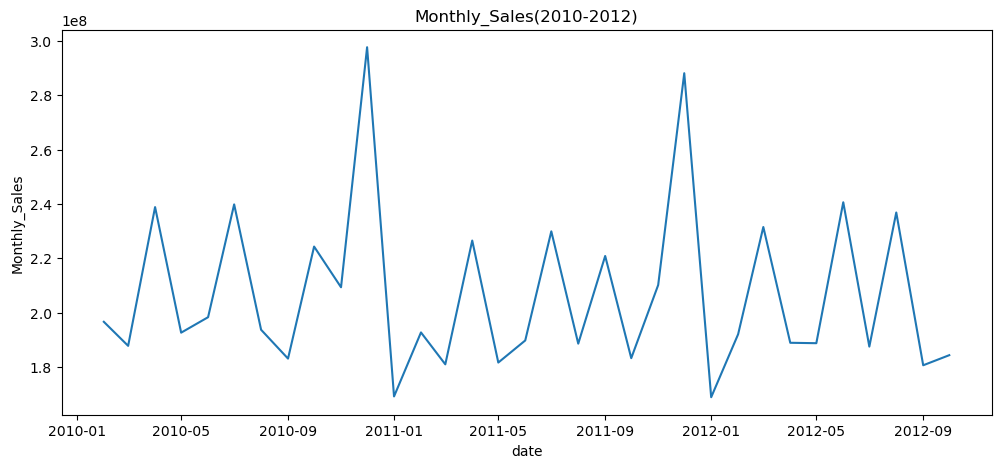

In [31]:
plt.figure(figsize=(12,5))
plt.plot(df['date'] , df['Monthly_sales'])
plt.xlabel('date')
plt.ylabel('Monthly_Sales')
plt.title('Monthly_Sales(2010-2012)')
plt.show()

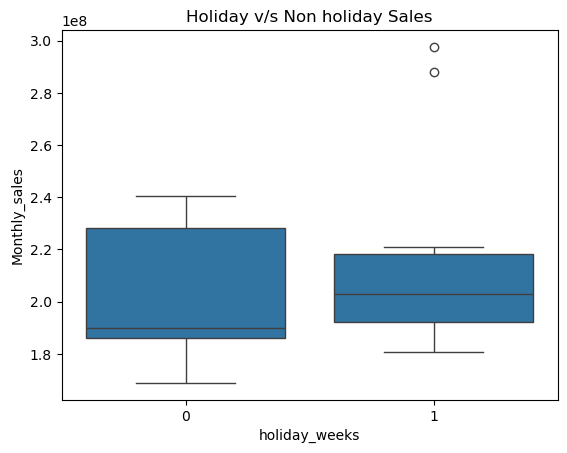

In [59]:
sns.boxplot(x= 'holiday_weeks', y = 'Monthly_sales', data = df)
plt.title('Holiday v/s Non holiday Sales')
plt.show()

In [61]:
df.columns

Index(['Year', 'Month', 'holiday_weeks', 'Monthly_sales', 'avg_temp',
       'avg_fuel_price', 'avg_cpi', 'avg_unemployment', 'date'],
      dtype='object')

In [79]:
coor_data = df[['Monthly_sales', 'avg_temp',
       'avg_fuel_price', 'avg_cpi', 'avg_unemployment']]

In [83]:
correl = coor_data.corr()

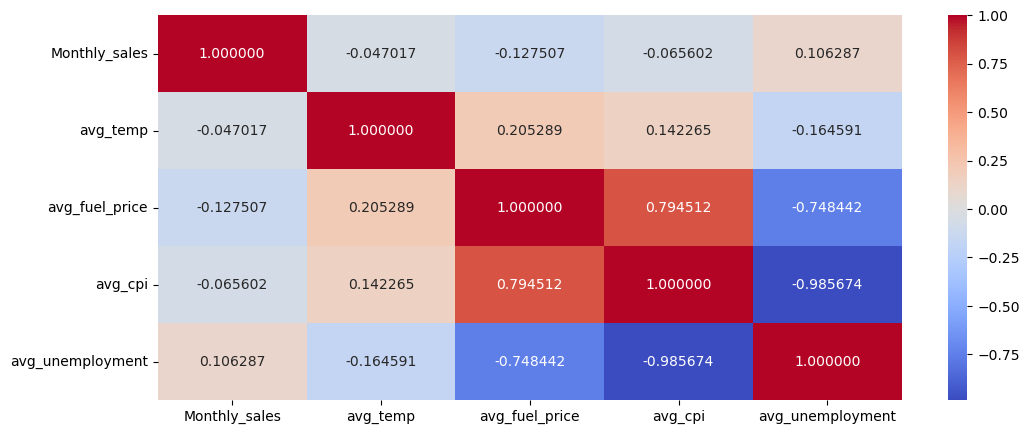

In [85]:
plt.figure(figsize = (12,5))
sns.heatmap(correl , annot = True , cmap = 'coolwarm', fmt = '2f' )
plt.show()


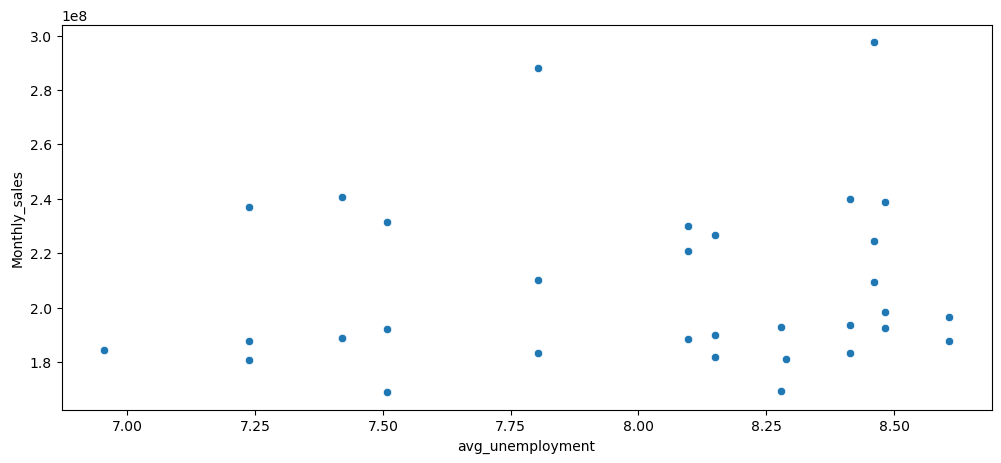

In [93]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = 'avg_unemployment'  ,y = 'Monthly_sales' , data = df )
plt.show()           
           

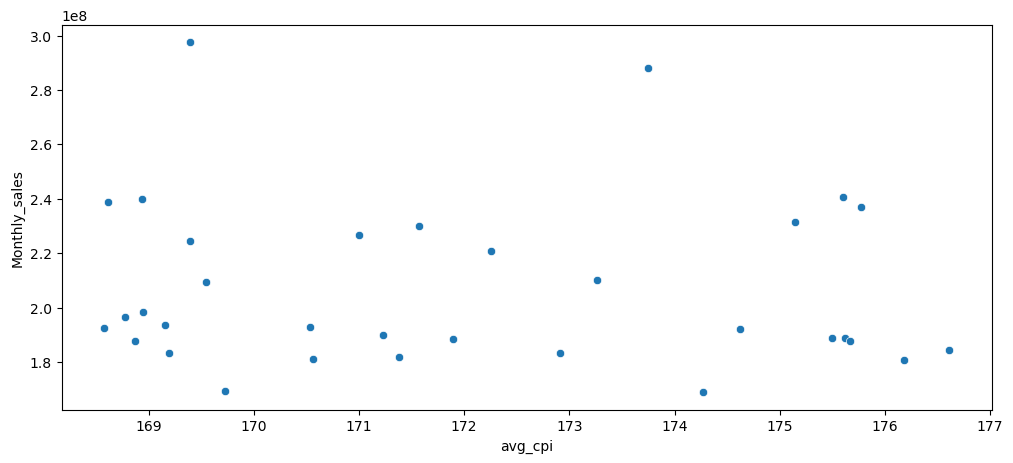

In [95]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = 'avg_cpi'  ,y = 'Monthly_sales' , data = df )
plt.show()           
           

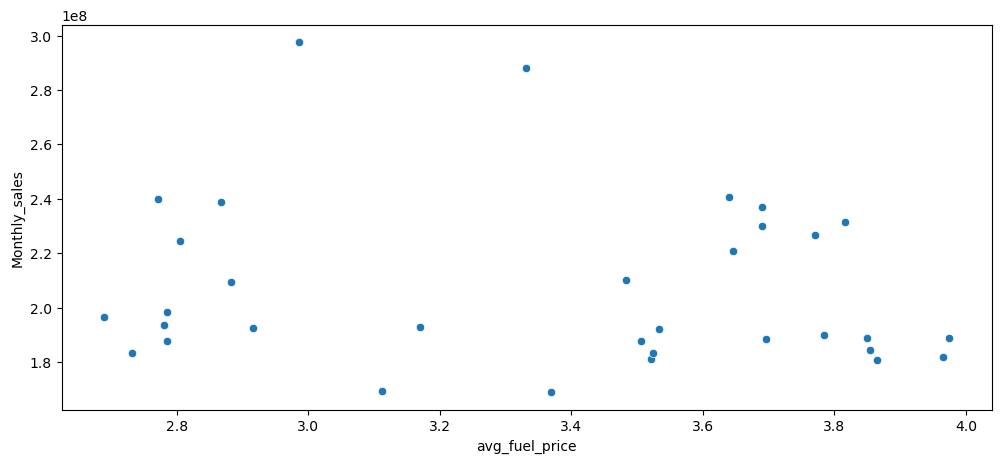

In [97]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = 'avg_fuel_price'  ,y = 'Monthly_sales' , data = df )
plt.show()           
           

In [99]:
x = df[['avg_temp', 'avg_fuel_price', 'avg_cpi', 'avg_unemployment']]

In [101]:
y = df['Monthly_sales']

In [111]:
x = sm.add_constant(x)

In [113]:
model = sm.OLS(y,x ).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Monthly_sales   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.9202
Date:                Sun, 21 Dec 2025   Prob (F-statistic):              0.466
Time:                        23:22:35   Log-Likelihood:                -613.37
No. Observations:                  33   AIC:                             1237.
Df Residuals:                      28   BIC:                             1244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.004e+09   2.95e+09  